# Cleaning for spanish poetry dataset

The main objective is clean our dataset and generate a new one.

- Load Dataset
- Drop duplicate and NaN
- Clean noise
- Generate new dataset

### Load Dataset

In [10]:
## Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load and first look to dataset
df = pd.read_csv("../../data/ES_corpus/PoemasDelAlmaDataset.csv")

df.head()


,Title,Poem,Author
0,Desvaríos,\n\n\r\nEntre nosotros crece la ropa en las ma...,Ángeles Mastretta
1,Caminito del indio,"\n\n\r\nCaminito del indio,\n\r\nsendero coya\...",Atahualpa Yupanqui
2,El poeta,Tú piensas que eres distinto\n\r\nporque te di...,Atahualpa Yupanqui
3,Si una guitarra triste...,Si una guitarra triste me dijera\n\r\nque no q...,Atahualpa Yupanqui
4,¡Adiós!,"\n\nLas cosas que mueren jamás resucitan, \r\n...",Alfonsina Storni


In [12]:
df['Poem'].duplicated().sum() ## Duplicated poems

1667

In [13]:
df=df.drop_duplicates(subset=['Poem']) ## We drop where poems are the same, titles and authors could be repeted
df=df.dropna(subset=['Title'])

In [14]:
df.describe()

,Title,Poem,Author
count,13066,13066,13066
unique,12144,13066,1332
top,Nocturno,\n\n\r\nEntre nosotros crece la ropa en las ma...,Pablo Neruda
freq,17,1,236


In [15]:
df['Poem'].duplicated().sum() ## Duplicated poems cleaned

0

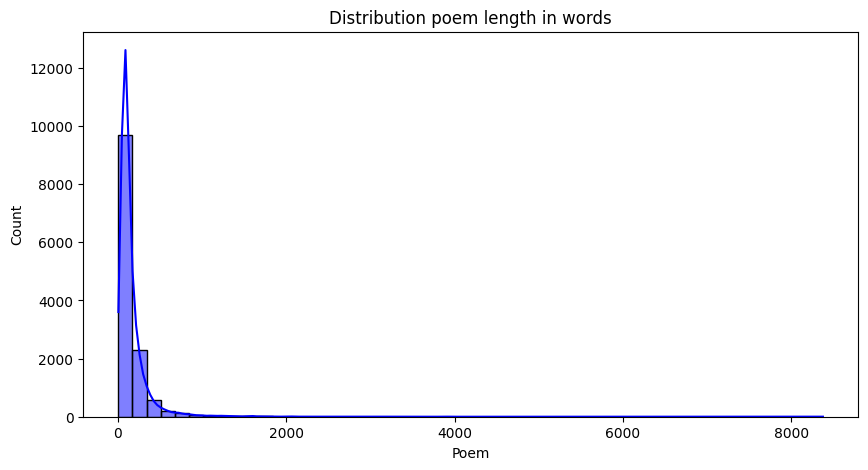

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df["Poem"].apply(lambda x: len(x.split())), bins=50, kde=True, color='blue')
plt.title('Distribution poem length in words')
plt.show()

In [17]:
## As we saw we must drop very long and very short poems in order to avoid noise

df = df[df['Poem'].apply(lambda x: len(x.split()) <= 600)]
df

,Title,Poem,Author
0,Desvaríos,\n\n\r\nEntre nosotros crece la ropa en las ma...,Ángeles Mastretta
1,Caminito del indio,"\n\n\r\nCaminito del indio,\n\r\nsendero coya\...",Atahualpa Yupanqui
2,El poeta,Tú piensas que eres distinto\n\r\nporque te di...,Atahualpa Yupanqui
3,Si una guitarra triste...,Si una guitarra triste me dijera\n\r\nque no q...,Atahualpa Yupanqui
4,¡Adiós!,"\n\nLas cosas que mueren jamás resucitan, \r\n...",Alfonsina Storni
...,...,...,...
14704,"Vení, lluvia, venite","Vení, lluvia, venite\n\r\ndejate venir hasta c...",Yolanda Blanco
14740,Historia de hoy,Sin gran habilidad sin pensarlo pusi...,Zoé Valdés
14741,Cazadora de sueños (I),que dejara de soñar/ me dijo/\n\r\nque basta d...,Zulema Moret
14742,Cazadora de sueños (IV),paseo por la casa en ruinas\n\r\nbusco algún a...,Zulema Moret


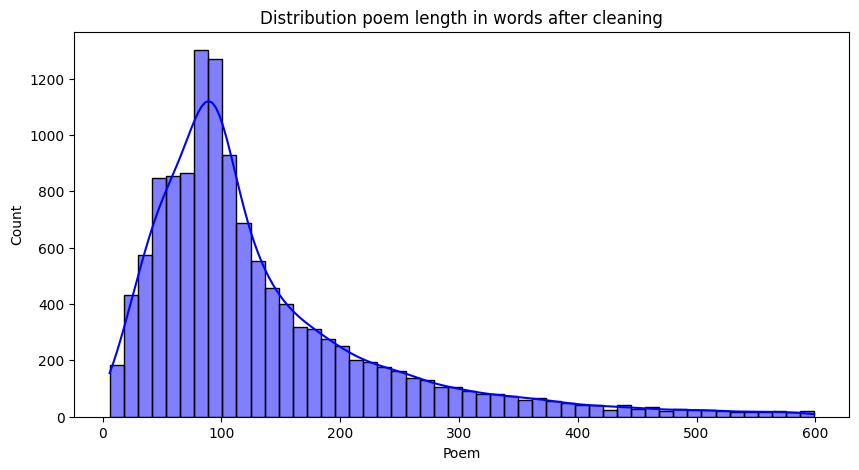

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df["Poem"].apply(lambda x: len(x.split())), bins=50, kde=True, color='blue')
plt.title('Distribution poem length in words after cleaning')
plt.show()

In [19]:
## Save dataset cleaned

df.to_csv("../../data/ES_corpus/ES_poetry_cleaned.csv")